In [48]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [49]:
df=pd.read_csv('marketing_campaign.csv')
df.head(10)
#print(df.columns)

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...
5,7446\t1967\tMaster\tTogether\t62513\t0\t1\t09-...
6,965\t1971\tGraduation\tDivorced\t55635\t0\t1\t...
7,6177\t1985\tPhD\tMarried\t33454\t1\t0\t08-05-2...
8,4855\t1974\tPhD\tTogether\t30351\t1\t0\t06-06-...
9,5899\t1950\tPhD\tTogether\t5648\t1\t1\t13-03-2...


In [50]:
df.isna().sum()

ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse    0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
# df.describe()

In [53]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                    --------------  ----- 
 0   ID	Year_Birth	Education	Marital_Status	Income	Kidhome	Teenhome	Dt_Customer	Recency	MntWines	MntFruits	MntMeat

In [73]:
# # df['Income'].isna().sum().sum()
# df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")
# df['Dt_Customer'].dtypes

In [74]:
# # Drop categorical columns for clustering
# categorical_columns = ["Education", "Marital_Status"]  # Add more if necessary
# df_numeric = df.drop(columns=categorical_columns)

# # EDA: Basic statistics
# print(df_numeric.describe())

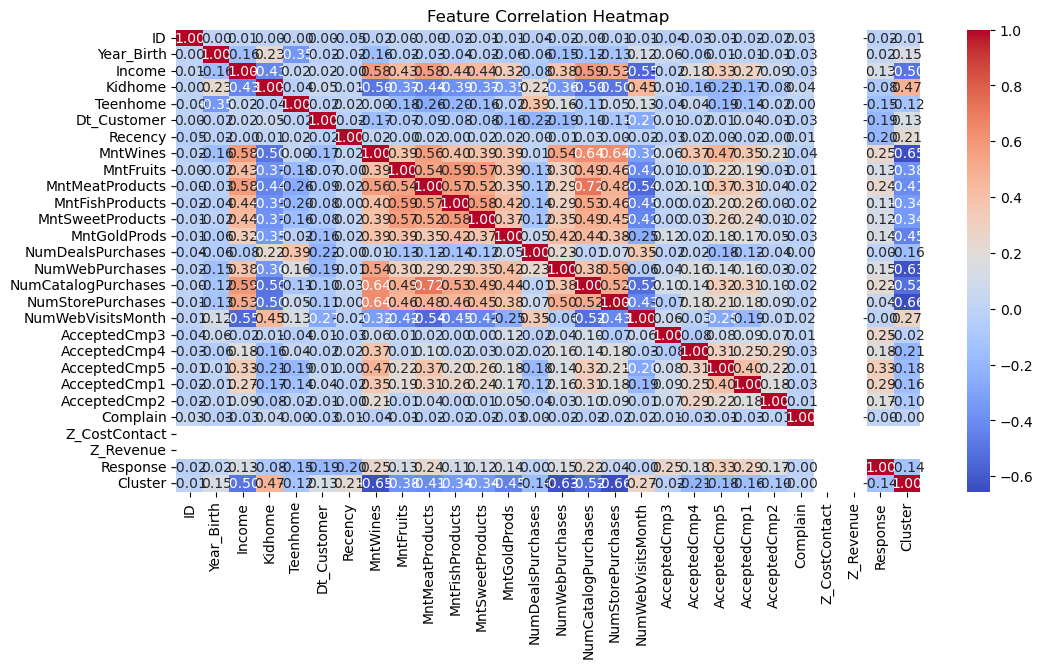

In [75]:
# EDA: Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [76]:
# Select relevant numerical features for clustering
features = ["Income", "Recency", "MntWines", "MntMeatProducts", "MntFishProducts", 
           "MntSweetProducts", "MntGoldProds", "NumWebPurchases", "NumStorePurchases",
            "NumCatalogPurchases", "NumWebVisitsMonth"]


In [77]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric[features])
scaled_data

array([[ 0.23569584,  0.30703926,  0.98378127, ..., -0.55078479,
         2.51089024,  0.69390374],
       [-0.23545419, -0.38366418, -0.87047948, ..., -1.1661254 ,
        -0.56871962, -0.13046347],
       [ 0.77399892, -0.79808624,  0.36272278, ...,  1.29523705,
        -0.22654075, -0.54264708],
       ...,
       [ 0.18947568,  1.44669994,  1.79502034, ...,  2.21824797,
         0.11563813,  0.28172013],
       [ 0.67940139, -1.41971934,  0.36866592, ...,  1.29523705,
         0.79999587, -0.95483068],
       [ 0.02520835, -0.31459383, -0.65355475, ..., -0.55078479,
        -0.56871962,  0.69390374]])

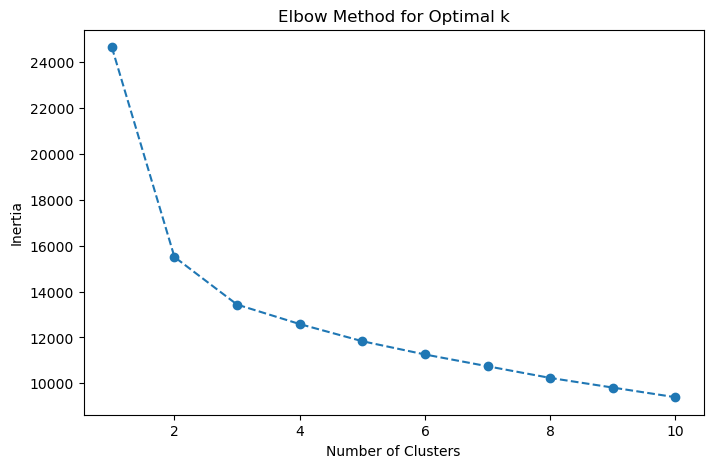

In [78]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)  # Trying different values of k

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Cluster
0    589
2    583
3    553
1    515
Name: count, dtype: int64


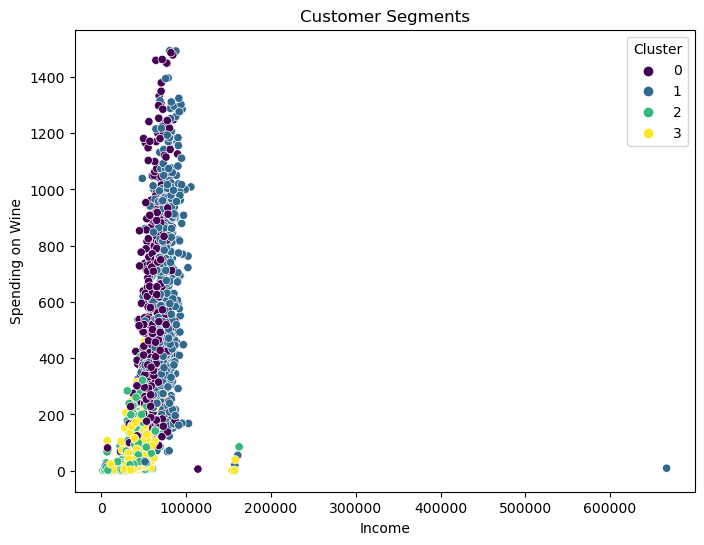

In [79]:
# Fit KMeans with the optimal number of clusters (choose based on elbow curve)
k_optimal = 4  # Adjust based on the elbow method result
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_numeric['Cluster'] = kmeans.fit_predict(scaled_data)

# Display cluster counts
print(df_numeric['Cluster'].value_counts())

# Visualize clusters with Income and Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_numeric["Income"], y=df_numeric["MntWines"], hue=df_numeric["Cluster"], palette="viridis")
plt.xlabel("Income")
plt.ylabel("Spending on Wine")
plt.title("Customer Segments")
plt.show()